<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S4_1_1_Le_diab%C3%A8te_en_Naive_Bayes_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le diabète en Naive Bayes 

Nous allons aujourd'hui étudier le diabète dans les population d'indiens d'amérique. Regardons comment Naive Bayes peut nous aider dans la prédiction de diabiète 

0. Importez les librairies usuelles 

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

In [166]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Importez le dataset dans un DataFrame 

In [0]:
data = pd.read_csv('/content/drive/My Drive/diabetes.csv')

In [168]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Faites une description du dataset

In [169]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3. Il semblerait que nous ayons des valeurs aberrantes. Enlevez toutes les valeurs pour lesquelles l'insuline est à plus de 3 écart-types de la moyenne 

In [170]:
cal = data.Insulin.mean()+(data.Insulin.std()*3)
#data = data.query("Insulin < @cal")
data["Insulin"] = [x if x < cal else data.Insulin.median() for x in data.Insulin]
data.query("Insulin > @cal")["Insulin"]

Series([], Name: Insulin, dtype: float64)

4. Faites un boxplot pour voir la répartition de l'Insuline dans le dataset 

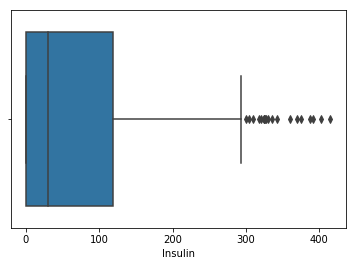

In [171]:
sns.boxplot(data.Insulin)

5. Regardez la distribution de chacune de vos colonnes 

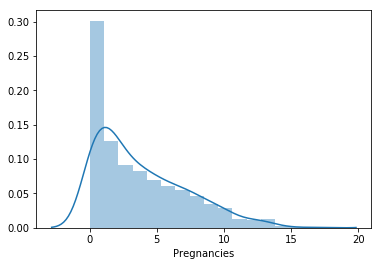

In [172]:
#for item in data.columns[:-1]:
  
'''figure, axes = plt.subplots(1, len(data.columns[:-1]))
index = 0
for axis in axes:
  #sns.countplot(high_scores[index])
    sns.distplot(data[index])
    index = index+1
plt.show()'''
sns.distplot(data["Pregnancies"])

6. On voit que nous avons encore des valeurs qui semblent aberrantes. Reproduisons la même techniques que nous avons utilisée plus haut pour retirer les valeurs aberrantes 

In [173]:
for item in data.columns[:-1]:
  cal = data[item].mean()+(data[item].std()*3)
  if item != "Insulin":
    #data = data.query('{}<{}'.format(item, cal))
    data[item] = [x if x < cal else data[item].median() for x in data[item]]
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,120.894531,69.105469,20.437500,67.651042,31.878255,0.449800,32.959635,0.348958
std,3.270644,31.972618,19.355807,15.698554,88.147648,7.663261,0.279715,11.327514,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,119.250000,36.500000,0.602000,40.000000,1.000000
max,13.000000,199.000000,122.000000,63.000000,415.000000,55.000000,1.461000,68.000000,1.000000


7. Remplacez les valeurs NaN par une interpolation

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [0]:
for item in data.columns[:-1]:
  data[item] = data[item].fillna(data[item].median())


8. Passons maintenant par une phase de normalisation. Normalisez toutes vos variables explicatives puis stockez les dans une variable X.

In [176]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = data.iloc[:,:-1]
X = sc_x.fit_transform(X)
X

array([[ 0.67842689,  0.84832379,  0.14964075, ...,  0.22482164,
         0.63391358,  1.50531432],
       [-0.85132017, -1.12339636, -0.16054575, ..., -0.68922293,
        -0.3534469 , -0.17311057],
       [ 1.29032571,  1.94372388, -0.26394125, ..., -1.12012966,
         0.79489627, -0.08477242],
       ...,
       [ 0.37247747,  0.00330087,  0.14964075, ..., -0.74145405,
        -0.73265056, -0.26144872],
       [-0.85132017,  0.1597866 , -0.47073225, ..., -0.23220065,
        -0.36060168,  1.24029986],
       [-0.85132017, -0.8730192 ,  0.04624525, ..., -0.19302731,
        -0.48223305, -0.87981579]])

9. Regardez maintenant la distribution de chacune des variables 

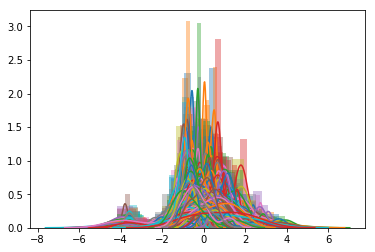

In [177]:
for i in range(len(X)):
  sns.distplot(X[i])

10. Séparez votre dataset en un train et un test set 

In [0]:
y = data.iloc[:,-1:]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

11. Importez Gaussian Naive Bayes & entrainez le sur votre données d'entraînement 

In [180]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

12. Regardez votre performance 

In [181]:
clf.score(X_train, y_train)

0.7597765363128491

In [182]:
clf.score(X_test, y_test)

0.7402597402597403

13. Voyons si nous pouvons améliorer notre modèle. Faites un pointplot sur chacune des varaibles par rapport à l'outcome. Pourrait-on créer de nouvelles variables ? 

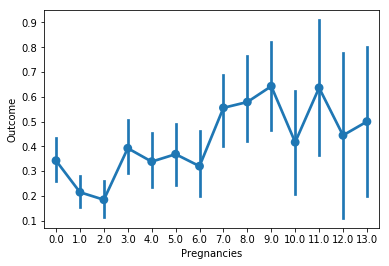

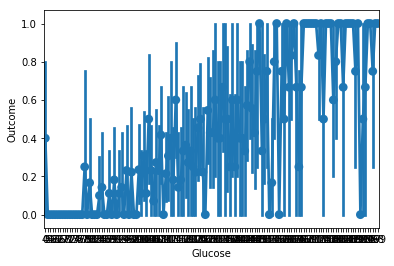

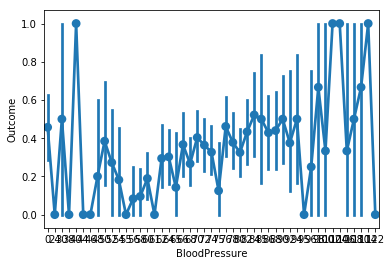

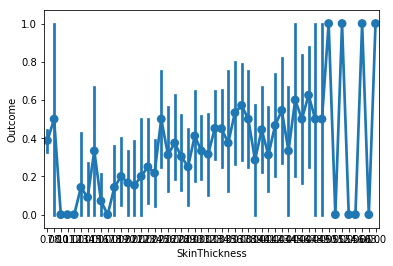

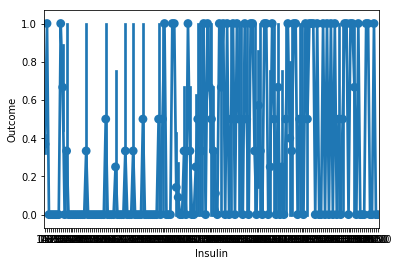

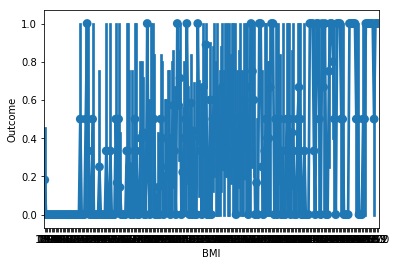

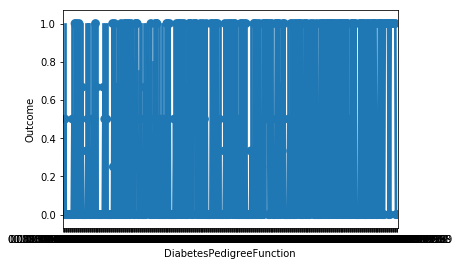

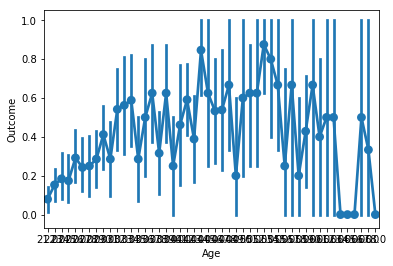

In [183]:
for i in range(len(data.columns)-1):
  plt.figure(i)
  sns.pointplot(x = data.columns[i], y = "Outcome", data = data )

14. Faisons un modèle de Bagging avec Naive Bayes. En utilisant le module ```BaggingClassifier```, Tentez de créer un nouveau modèle

In [198]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import check_random_state
from sklearn.model_selection import ParameterGrid
rng = check_random_state(0)
grid = ParameterGrid({"max_samples": [0.5, 1.0],
                      "max_features": [1, 2, 4],
                      "bootstrap": [True, False],
                      "bootstrap_features": [True, False]})
max_score = 0
params_top = {}
for params in grid:
  bc = BaggingClassifier(base_estimator=GaussianNB(),
                              random_state=rng,
                              **params)
  bc.fit(X_train, y_train)
  if bc.score(X_test, y_test) > max_score:
    max_score = bc.score(X_test, y_test)
    params_top = params

print("{}, {}".format(params_top, max_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'bootstrap': False, 'bootstrap_features': False, 'max_features': 4, 'max_samples': 1.0}, 0.7619047619047619


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

15. Tentez de refaire votre modèle cette fois avec Bernouilli Naive Bayes 

In [187]:
from sklearn.naive_bayes import BernoulliNB
clfNB = BernoulliNB()
clfNB.fit(X_train, y_train)
clfNB.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7359307359307359

16. Refaites un modèle de Bagging pour voir si vous pouvez encore améliorer votre score 

In [195]:
'''bc = BaggingClassifier(BernoulliNB(), n_estimators=10, warm_start=True, random_state=83)
bc.fit(X_train, y_train)
bc.score(X_test, y_test)'''

rng = check_random_state(0)
grid = ParameterGrid({"max_samples": [0.5, 10],
                      "max_features": [1, 2, 4],
                      "bootstrap": [True, False],
                      "bootstrap_features": [True, False]})
max_score = 0
params_top = {}
for params in grid:
  bc = BaggingClassifier(base_estimator=BernoulliNB(),
                              random_state=rng,
                              **params)
  bc.fit(X_train, y_train)
  if bc.score(X_test, y_test) > max_score:
    max_score = bc.score(X_test, y_test)
    params_top = params

print("{}, {}".format(params_top, max_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'bootstrap': False, 'bootstrap_features': True, 'max_features': 4, 'max_samples': 0.5}, 0.7359307359307359


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin